In [1]:
# load from .mat file
# plot the data
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# load data
boat_num = sio.loadmat('./boat_num_list.mat')['boat_num_list'][0]

In [2]:
# drop the third data
boat_num = np.delete(boat_num, 2)

In [3]:
import os
def list_files(directory):
    """ 列出指定目录下的所有文件（不包括子目录中的文件） """
    files = []
    # 遍历目录
    for entry in os.listdir(directory):
        # 获取完整路径
        full_path = os.path.join(directory, entry)
        # 检查这个路径是否是文件
        if os.path.isfile(full_path):
            files.append(full_path)
    return files

# 使用示例
directory = '../EECS504_final_project/satellite_images/'  # 替换为您的目录路径
files = list_files(directory)

In [4]:
import re

def extract_date(filename):
    match = re.search(r'satellite_image_(\d{4}-\d{2}-\d{2})T', filename)
    if match:
        return match.group(1)
    else:
        return None

# 测试函数
dates = [extract_date(f) for f in files]


In [12]:
boat_num_17to19 = boat_num[6:-20] # 6:-5
dates_17to19 = dates[6:-20]
len(dates_17to19)

52

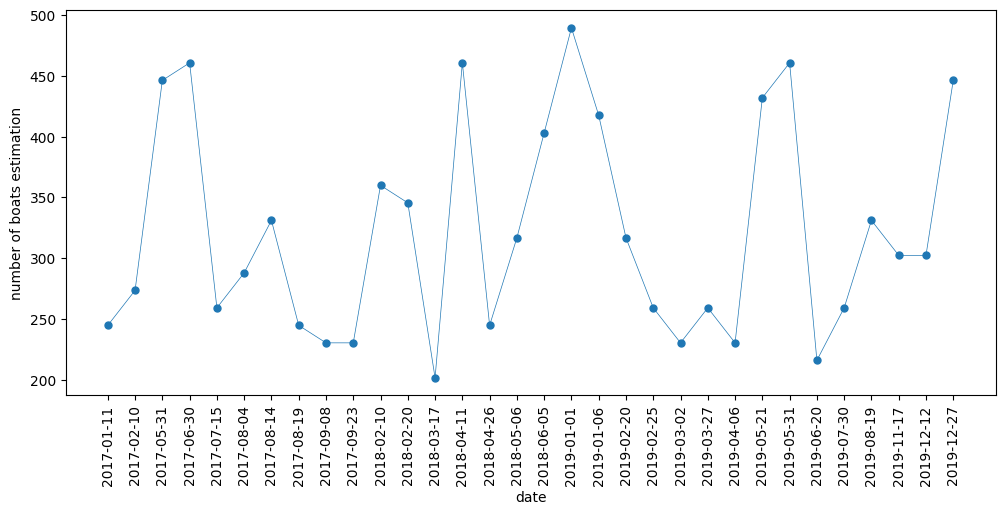

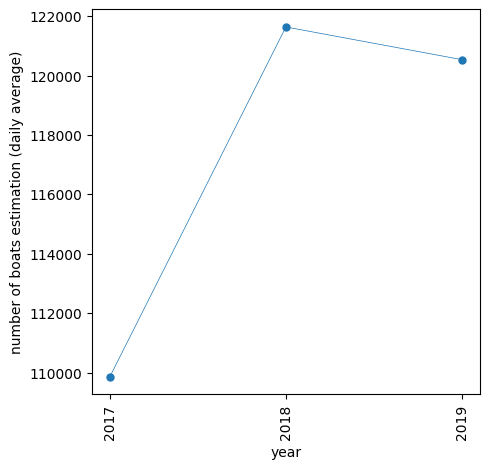

In [14]:
# drop boat_num when boat_num is less than 100
for i in range(len(boat_num_17to19)):
    if boat_num_17to19[i] < 200:
        boat_num_17to19[i] = 0

zero_index = np.where(boat_num_17to19 == 0)[0]
boat_num_17to19 = np.delete(boat_num_17to19, zero_index)
dates_17to19 = [dates_17to19[i] for i in range(len(dates_17to19)) if i not in zero_index]

# set figure size
plt.figure(figsize=(12, 5))
plt.plot(boat_num_17to19, '-o', markersize=5, linewidth=0.5)
plt.xlabel('date')
plt.ylabel('number of boats estimation')
# set xrange
plt.xticks(np.arange(0, len(dates_17to19), 1), dates_17to19, rotation=90)
plt.show()

dates_17_idx = []
dates_18_idx = []
dates_19_idx = []

for date in dates_17to19:
    if date.startswith('2017'):
        dates_17_idx.append(dates_17to19.index(date))
    elif date.startswith('2018'):
        dates_18_idx.append(dates_17to19.index(date))
    elif date.startswith('2019'):
        dates_19_idx.append(dates_17to19.index(date))
    else:
        continue
    
# compute year average
boat_num_17 = np.mean(boat_num_17to19[dates_17_idx])
boat_num_18 = np.mean(boat_num_17to19[dates_18_idx])
boat_num_19 = np.mean(boat_num_17to19[dates_19_idx])

year_avgs = [boat_num_17*365, boat_num_18*365, boat_num_19*365]

# plot year average
plt.figure(figsize=(5, 5))
plt.plot(year_avgs, '-o', markersize=5, linewidth=0.5)
plt.xlabel('year')
plt.ylabel('number of boats estimation (daily average)')
plt.xticks(np.arange(0, 3, 1), ['2017', '2018', '2019'], rotation=90)
plt.show()


[1.0, 1.1073137388926861, array([inf])]

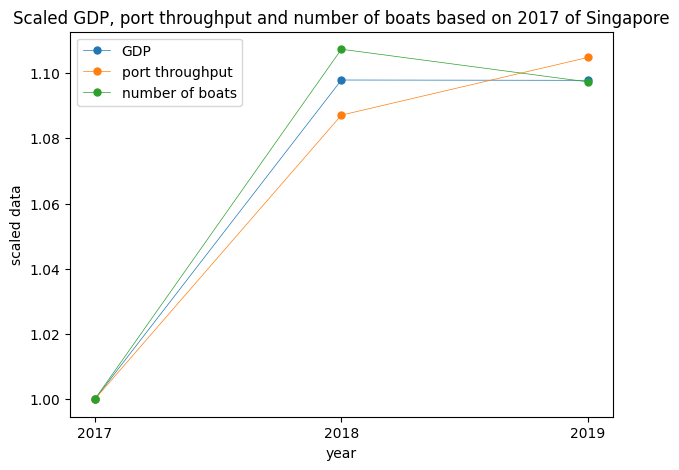

In [32]:
#
GDP = [3432.73, 3768.70, 3768.37]
GDP_rescale = [3432.73/3432.73, 3768.70/3432.73, 3768.37/3432.73]
port_throughput = [33666600.000, 36599200.000, 37195000.000]
port_throughput_rescale = [33666600.000/33666600.000, 36599200.000/33666600.000, 37195000.000/33666600.000]
year_avgs_rescale = [year_avgs[0]/year_avgs[0], year_avgs[1]/year_avgs[0], year_avgs[2]/year_avgs[0]]

#plot GDP, port_throughput, year_avgs together and rescale the data
plt.figure(figsize=(7, 5))
plt.plot(GDP_rescale, '-o', markersize=5, linewidth=0.5, label='GDP')
plt.plot(port_throughput_rescale, '-o', markersize=5, linewidth=0.5, label='port throughput')
plt.plot(year_avgs_rescale, '-o', markersize=5, linewidth=0.5, label='number of boats')
plt.xlabel('year')
plt.ylabel('scaled data')
plt.legend()
plt.xticks(np.arange(0, 3, 1), ['2017', '2018', '2019'])
plt.title('Scaled GDP, port throughput and number of boats based on 2017 of Singapore')
plt.savefig('GDP_port_throughput_year_avgs.png', dpi=300)
plt.show()
